<a href="https://colab.research.google.com/github/gvogiatzis/CS4740/blob/main/CS4740_lecture06.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from collections import defaultdict
from random import choice,random
import matplotlib.pyplot as plt

alpha = 0.5

actions = [(1,0),(-1,0),(0,1),(0,-1)]
action_names = ["right","left","up","down"]

visits = defaultdict(lambda :0)
def init_state():
  return (0,0)

def epsilon_greedy(epsilon, actions, Q):
  if random() < epsilon:
    return choice(actions)
  else:
    return max(actions, key=lambda a:Q[S,a])


def next_state_and_reward(s,a):
  wind = [0,0,0,1,1,1,2,2,1,0]
  clamp = lambda x,u,v: min(max(u,x),v)
  x = clamp(s[0] + a[0],0,9)
  y = clamp(s[1] + a[1] + wind[s[0]], -3,3)
  return (x,y), -1

def done(s):
  return s==(7,0)

In [2]:
MAX_EPISODES = 1000
Q=defaultdict(lambda :0)
for e in range(MAX_EPISODES):
  S=init_state()
  while not done(S):
    A = epsilon_greedy(0.1, actions, Q)
    S_new, R = next_state_and_reward(S,A)
    target = R + max([Q[S_new,a] for a in actions])
    Q[S,A] = (1-alpha) * Q[S,A] + alpha * target
    S = S_new

In [7]:
Q=defaultdict(lambda :0)
S = init_state()
episodes=0
E=[]

rewards=[]
tot_reward=0
for t in range(8000):
  if done(S):    
    episodes+=1
    rewards.append(tot_reward)
    tot_reward=0
    S=init_state()
  A = epsilon_greedy(0.1, actions, Q)
  S_new,R = next_state_and_reward(S,A)
  tot_reward += R
  target = R + max([Q[S_new,a] for a in actions])
  Q[S,A] = (1-alpha) * Q[S,A] + alpha * target
  S = S_new
  E.append(episodes)

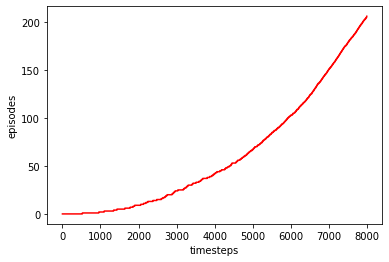

In [6]:
f = plt.figure()
plt.plot(E,'r-')
plt.xlabel('timesteps')
plt.ylabel('episodes')
f.savefig('episodes_vs_timesteps.pdf')

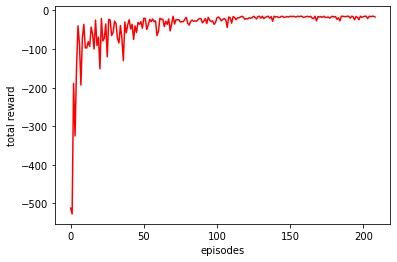

In [11]:
f = plt.figure()
plt.plot(rewards,'r-')
plt.xlabel('episodes')
plt.ylabel('total reward')
f.savefig('totreward_vs_episodes.pdf')

In [12]:
[Q[(0,0),a] for a in actions]

[-15.0, -15.549544741828274, -15.010163626472858, -15.096718828716966]

In [ ]:
S=init_state()
i=1
while not done(S):
  A = epsilon_greedy(0.0, actions, Q)
  S_new, R = next_state_and_reward(S,A)
  print(f"{i}:{S}->{S_new}")
  i+=1
  S = S_new

1:(0, 0)->(1, 0)
2:(1, 0)->(2, 0)
3:(2, 0)->(3, 0)
4:(3, 0)->(4, 1)
5:(4, 1)->(5, 2)
6:(5, 2)->(6, 3)
7:(6, 3)->(7, 3)
8:(7, 3)->(8, 3)
9:(8, 3)->(9, 3)
10:(9, 3)->(9, 2)
11:(9, 2)->(9, 1)
12:(9, 1)->(9, 0)
13:(9, 0)->(9, -1)
14:(9, -1)->(8, -1)
15:(8, -1)->(7, 0)


In [31]:
S=init_state()
i=1
print("\\begin{tabular}{c|cccc}")
print(" & right & left & up & down\\\\")
print("\\hline")
while not done(S):
  print(f"{S}&",end='')
  for a in actions:
      print(f"{Q[S,a]:0.2f} & ",end='')
  print("\\\\")
  A = epsilon_greedy(0.0, actions, Q)
  S_new, R = next_state_and_reward(S,A)
  # print(f"{i}:{S}->{S_new}")
  i+=1
  S = S_new

print(f"{S} &",end='')
for a in actions:
    print(f"{Q[S,a]:0.2f} &",end='')
print("\\\\")
print("\\end{tabular}")

\begin{tabular}{c|cccc}
 & right & left & up & down\\
\hline
(0, 0)&-15.00 & -15.55 & -15.01 & -15.10 & \\
(1, 0)&-14.00 & -15.85 & -14.00 & -14.81 & \\
(2, 0)&-13.00 & -13.24 & -13.76 & -13.83 & \\
(3, 0)&-12.00 & -13.57 & -12.92 & -12.50 & \\
(4, 1)&-11.00 & -11.76 & -11.72 & -11.94 & \\
(5, 2)&-10.00 & -11.83 & -10.09 & -10.87 & \\
(6, 3)&-9.00 & -10.54 & -10.00 & -9.99 & \\
(7, 3)&-8.00 & -9.90 & -8.94 & -8.99 & \\
(8, 3)&-7.00 & -8.94 & -7.94 & -7.98 & \\
(9, 3)&-7.00 & -7.99 & -7.00 & -6.00 & \\
(9, 2)&-5.89 & -7.59 & -6.82 & -5.00 & \\
(9, 1)&-4.99 & -6.77 & -5.98 & -4.00 & \\
(9, 0)&-3.94 & -5.38 & -4.84 & -3.00 & \\
(9, -1)&-2.94 & -2.00 & -3.88 & -2.89 & \\
(8, -1)&-3.97 & -1.00 & -3.48 & -2.00 & \\
(7, 0) &0.00 &0.00 &0.00 &0.00 &\\
\end{tabular}


In [19]:
for sx in range(10):
  for sy in range(-3,4):
    print(f"{(sx,sy)}\t|",end='')
    for a in actions:
      print(f"{Q[(sx,sy),a]:0.2f}\t",end='')
    print()


(0, -3)	|-13.29	-13.52	-13.79	-13.52	
(0, -2)	|-13.73	-13.38	-13.45	-13.85	
(0, -1)	|-14.35	-14.53	-14.69	-14.31	
(0, 0)	|-15.00	-15.55	-15.01	-15.10	
(0, 1)	|-14.40	-14.70	-14.50	-14.60	
(0, 2)	|-13.95	-13.91	-14.02	-14.50	
(0, 3)	|-13.72	-13.60	-13.80	-14.07	
(1, -3)	|-12.81	-13.29	-12.97	-13.09	
(1, -2)	|-13.21	-13.48	-13.64	-13.39	
(1, -1)	|-13.91	-14.38	-14.58	-14.03	
(1, 0)	|-14.00	-15.85	-14.00	-14.81	
(1, 1)	|-13.73	-13.89	-13.88	-14.19	
(1, 2)	|-13.46	-13.73	-13.48	-13.84	
(1, 3)	|-13.39	-13.45	-13.57	-13.16	
(2, -3)	|-12.04	-12.92	-11.86	-12.36	
(2, -2)	|-12.42	-13.14	-13.11	-12.41	
(2, -1)	|-12.99	-13.09	-13.18	-13.11	
(2, 0)	|-13.00	-13.24	-13.76	-13.83	
(2, 1)	|-12.99	-13.11	-13.15	-13.43	
(2, 2)	|-12.78	-13.82	-13.15	-12.88	
(2, 3)	|-12.90	-12.77	-12.68	-13.08	
(3, -3)	|-11.23	-11.96	-11.36	-11.32	
(3, -2)	|-11.68	-12.57	-11.99	-11.98	
(3, -1)	|-12.00	-12.02	-12.15	-12.36	
(3, 0)	|-12.00	-13.57	-12.92	-12.50	
(3, 1)	|-12.00	-12.70	-12.27	-12.41	
(3, 2)	|-12.00	-12.37	-12.